In [17]:
import sys
sys.path.append('../wec-grid-code') # 
import wec_grid_class as wg
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (15,10)

In [18]:
# Read in case file 
case14 = r"../input_files/case14.raw"

In [19]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case14,"fnsl",3)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

In [20]:
pf.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,0.0,1.060000,0.000000,3,232.393265,-16.549339,NaN,NaN,232.393265,-16.549339
1,2,BUS 2,0.0,1.045000,-4.982592,2,40.000000,43.557102,21.700001,12.700001,18.299999,30.857101
2,3,BUS 3,0.0,1.010000,-12.725105,2,0.000000,25.075377,94.199997,19.000000,-94.199997,6.075377
3,4,BUS 4,0.0,1.017671,-10.312905,1,NaN,NaN,47.799999,-3.900000,-47.799999,3.900000
4,5,BUS 5,0.0,1.019514,-8.773857,1,NaN,NaN,7.600000,1.600000,-7.600000,-1.600000
5,6,BUS 6,0.0,1.070000,-14.220952,2,0.000000,12.731007,11.200000,7.500000,-11.200000,5.231006
6,7,BUS 7,0.0,1.061520,-13.359633,1,NaN,NaN,NaN,NaN,NaN,NaN
7,8,BUS 8,0.0,1.090000,-13.359632,2,0.000000,17.623468,NaN,NaN,0.000000,17.623468
8,9,BUS 9,0.0,1.055932,-14.938527,1,NaN,NaN,29.499998,16.600000,-29.499998,-16.600000
9,10,BUS 10,0.0,1.050985,-15.097295,1,NaN,NaN,9.000000,5.800000,-9.000000,-5.800000


In [22]:
injection_file = ('../input_files/WECgen_data.csv')
injection = pd.read_csv(injection_file)

for i in range(len(injection)):
    print("Time: {}".format(injection.iloc[i].time))
    print("P setpoint: {}".format(injection.pg.iloc[i]))

    pf.ac_injection(pf.wecBus_num, injection.pg.iloc[i], injection.vs.iloc[i],
                        pf.solver, injection.iloc[i].time)
    print("========================")

Time: 0.0
P setpoint: nan

 No power flow data changed for machine "1" at bus 3 [BUS 3             ]

 Power flow data changed for bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.01000         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0219(      3     )    0.0524(      4     )
                                                             0.01000(      3     )   0.00005(      3     )
   1         0.0003(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00005(      3     )
   2         0.0000(      3     )    0.0000(      9     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW     -0.00 Mvar      0.00 MVA at bus 3 [BUS 3             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN   

Time: 4500.0
P setpoint: 0.0234453068373952

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.201019E-01    0.234453E-01  PG

 Power flow data changed for bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.01000         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0219(      3     )    0.0524(      4     )
                                                             0.01000(      3     )   0.00006(      3     )
   1         0.0003(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00005(      3     )
   2         0.0000(      3     )    0.0000(      9     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 2 [BUS 2             ]
 System total absolute mismatch:               

Time: 10200.0
P setpoint: 0.018432496417152

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.182957E-01    0.184325E-01  PG

 Power flow data changed for bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.01000         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0219(      3     )    0.0524(      4     )
                                                             0.01000(      3     )   0.00005(      3     )
   1         0.0003(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00005(      3     )
   2         0.0000(      3     )    0.0000(      9     )


 Reached tolerance in 2 iterations

 Largest mismatch:     -0.00 MW      0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:               

                                                             0.01000(      3     )   0.00005(      3     )
   1         0.0003(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00005(      3     )
   2         0.0000(      3     )    0.0000(      9     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW     -0.00 Mvar      0.00 MVA at bus 3 [BUS 3             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1                  232.4    332.4     0.0     -16.5*    10.0     0.0
Time: 15300.0
P setpoint: 0.0203198228700823

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.203885E-01    0.203198E-01  PG

 Power flow data changed for bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  D

Time: 19800.0
P setpoint: 0.0197034789906012

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.178981E-01    0.197035E-01  PG

 Power flow data changed for bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.01000         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0219(      3     )    0.0524(      4     )
                                                             0.01000(      3     )   0.00005(      3     )
   1         0.0003(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00005(      3     )
   2         0.0000(      3     )    0.0000(      9     )


 Reached tolerance in 2 iterations

 Largest mismatch:     -0.00 MW     -0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:              

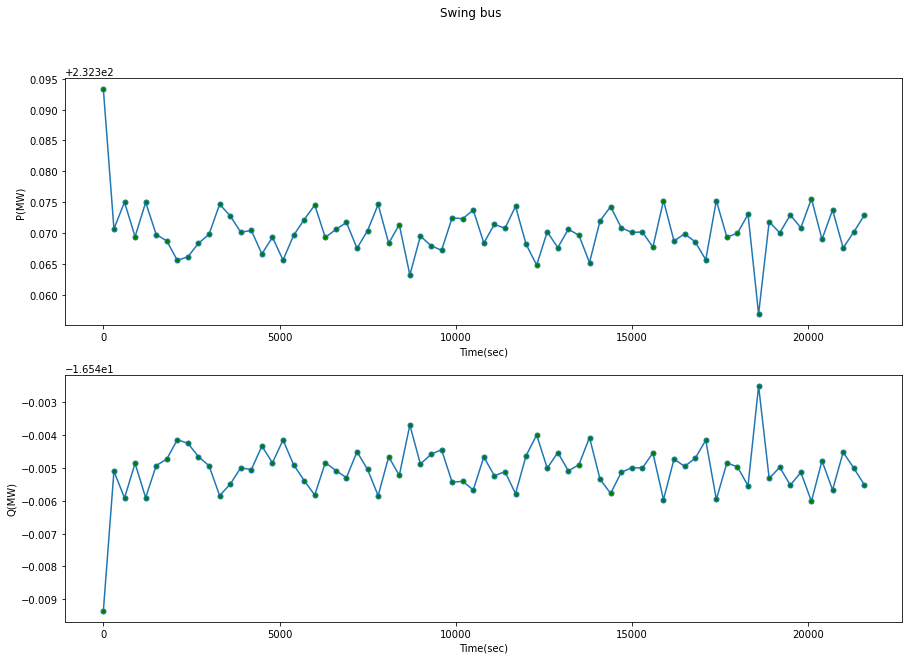

In [23]:
pf.plotSwingBus()

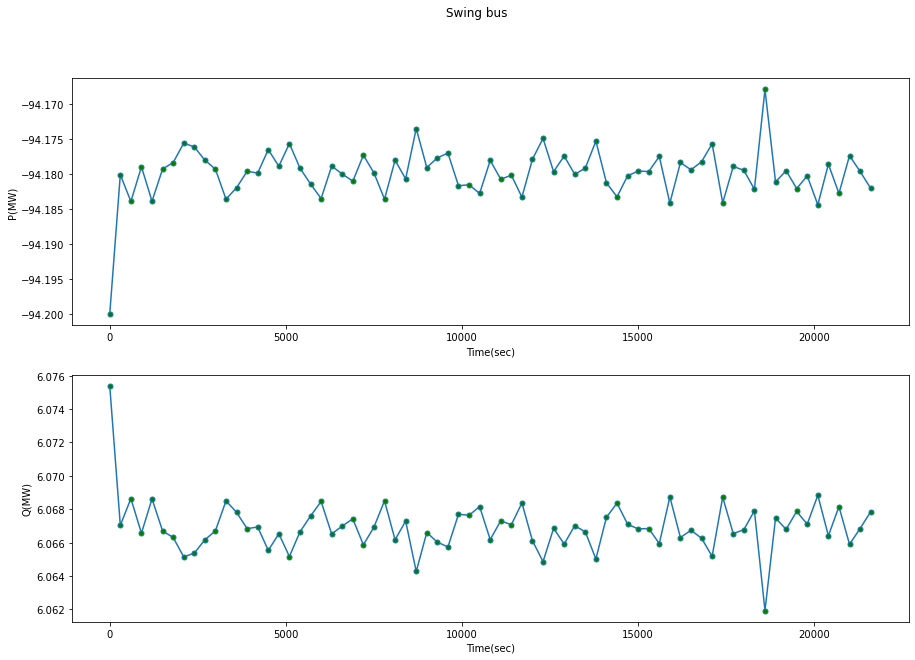

In [24]:
pf.plotWecBus()